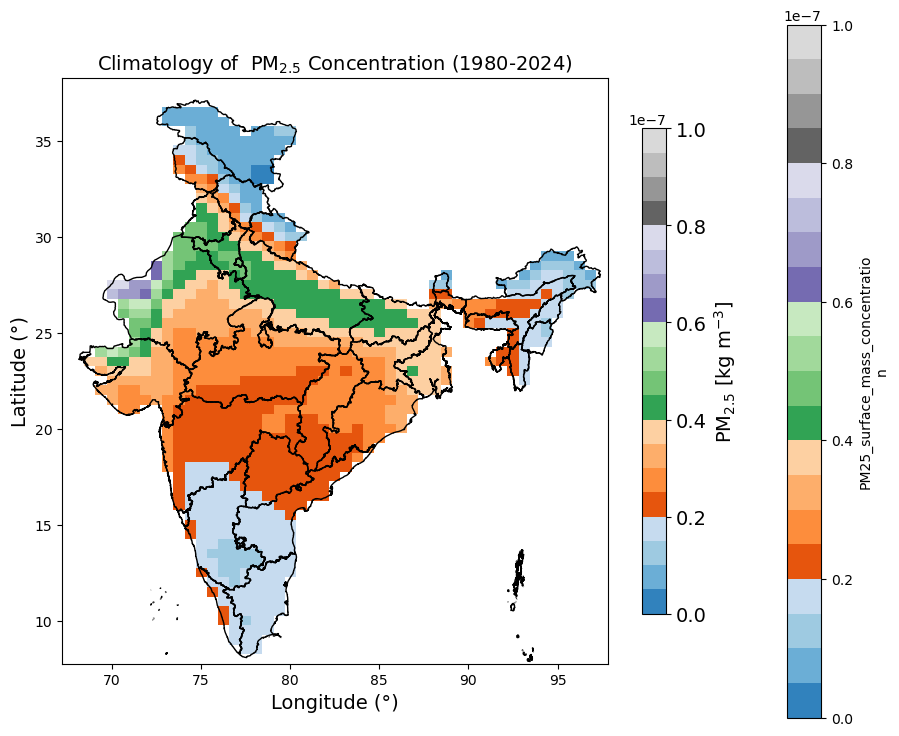

In [1]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate the time mean
time_mean_subset = subset_data.mean(dim='time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)

# Manually specify the CRS based on your knowledge
# For example, assuming the data is in WGS 84 (EPSG:4326)
nc_crs = 'EPSG:4326'

# Reproject the shapefile to match the CRS of the NetCDF data
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the subset data
plt.figure(figsize=(11, 9))
plot = time_mean_subset.plot(cmap='tab20c', vmin=0, vmax=1.0*1e-7)

# Overlay the reprojected shapefile
india_shape.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1)

# Add colorbar with smaller size and set the label
cbar = plt.colorbar(plot, shrink=0.7)
cbar.set_label('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)  # Set label text size

# Set color bar label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Add title and labels
plt.title('Climatology of  PM$_{2.5}$ Concentration (1980-2024)', fontsize=14)  # Increase title font size
plt.xlabel('Longitude (°)', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Latitude (°)', fontsize=14)  # Increase y-axis label font size

# Show plot
plt.show()


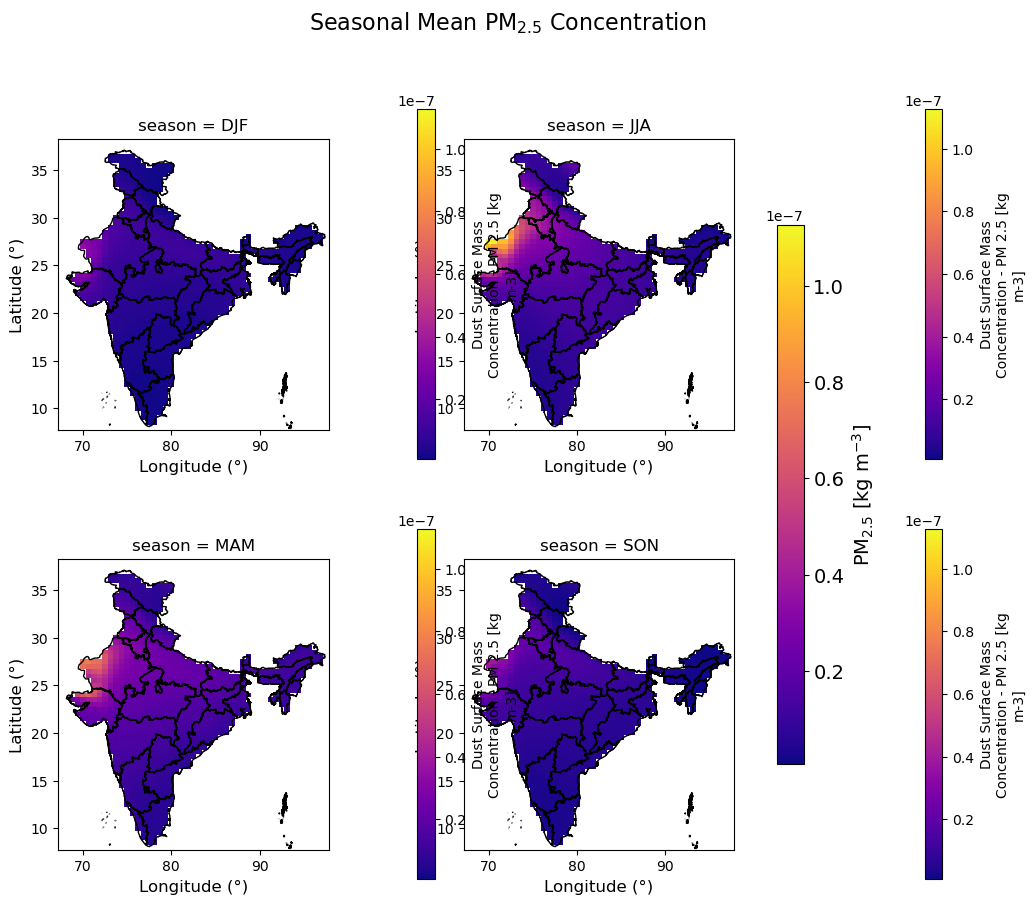

In [4]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Get the overall minimum and maximum values for all seasonal time means
overall_min = seasonal_time_means.min().values
overall_max = seasonal_time_means.max().values

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List to store all plots for colorbar creation
plots = []

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    plot = seasonal_time_means.sel(season=season).plot(ax=ax, cmap='plasma',
                                                        vmin=overall_min, vmax=overall_max)
    plots.append(plot)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add color bar with one single label
cbar = fig.colorbar(plots[0], ax=axs, shrink=0.7, location='right')
cbar.set_label('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)  # Set label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.show()


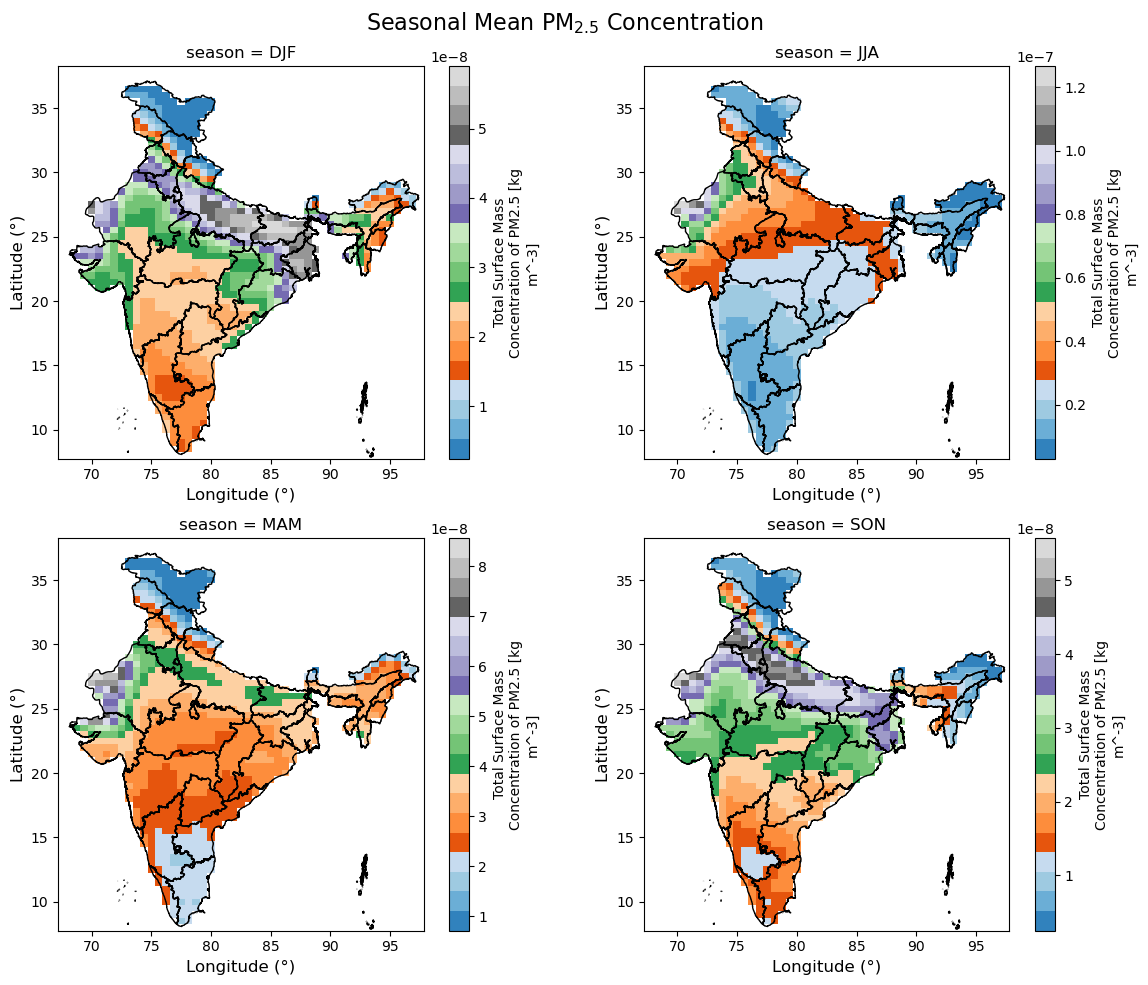

In [2]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    seasonal_time_means.sel(season=season).plot(ax=ax, cmap='tab20c')
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


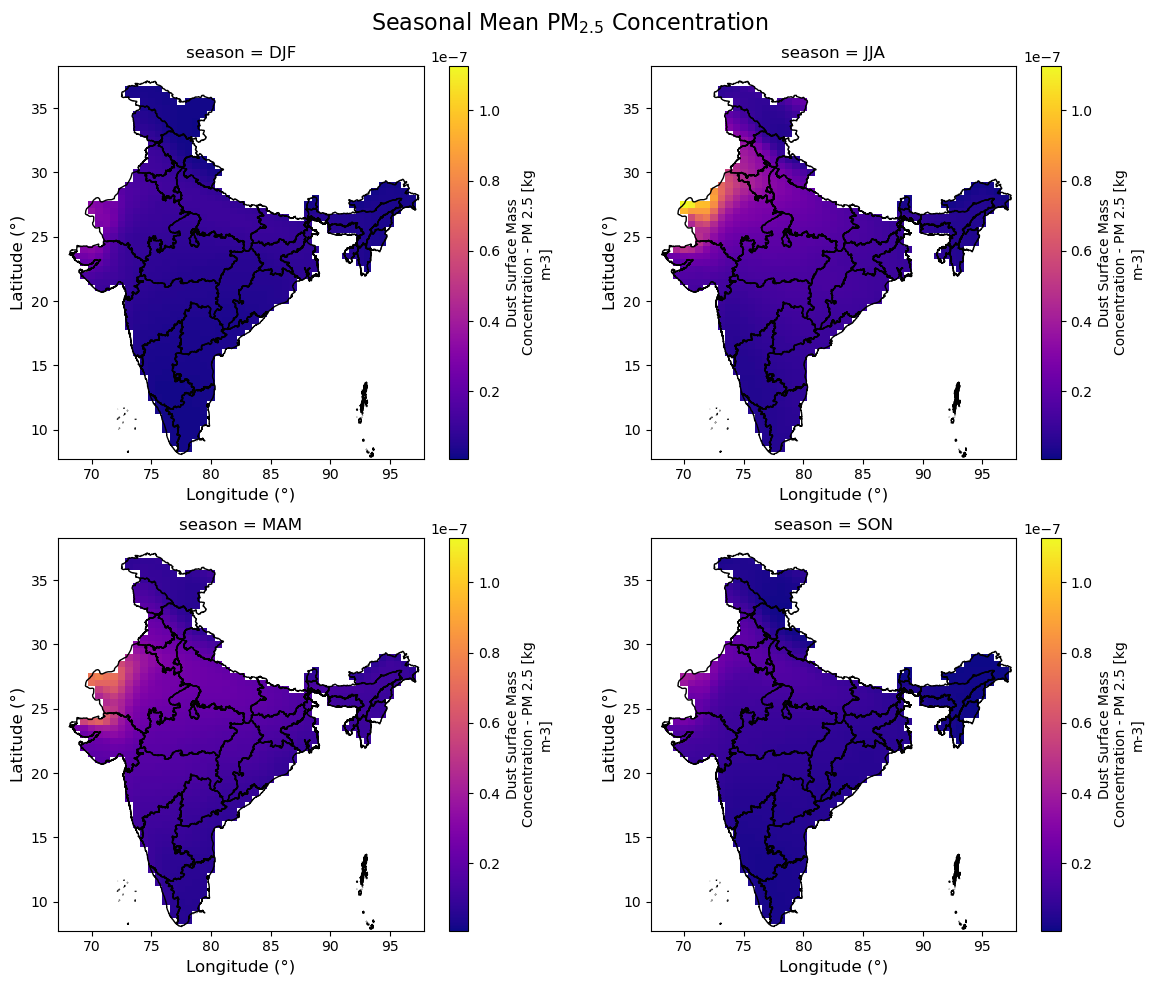

In [6]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Get the overall minimum and maximum values for all seasonal time means
overall_min = seasonal_time_means.min().values
overall_max = seasonal_time_means.max().values

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    plot = seasonal_time_means.sel(season=season).plot(ax=ax, cmap='plasma',
                                                        vmin=overall_min, vmax=overall_max)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


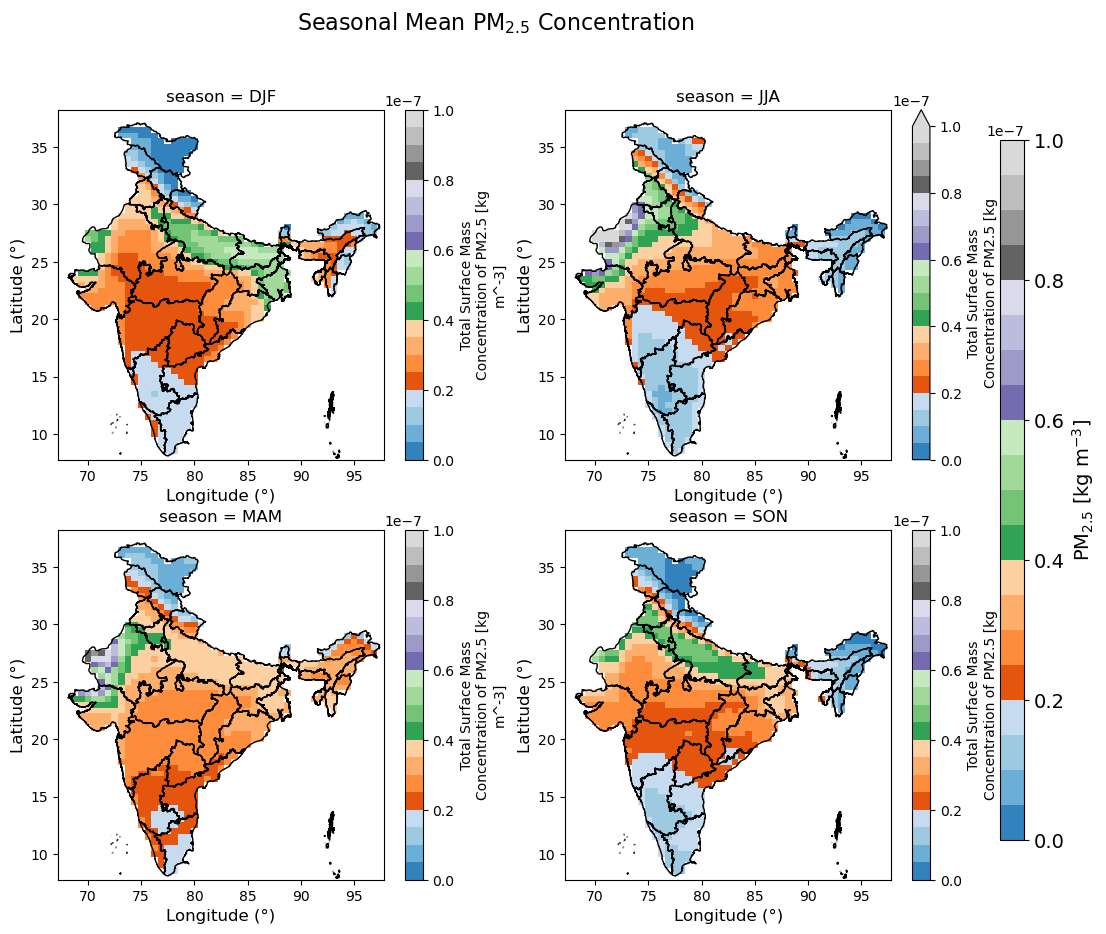

In [42]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Get the overall minimum and maximum values for all seasonal time means
overall_min = seasonal_time_means.min().values
overall_max = seasonal_time_means.max().values

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plots = []

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    plot = seasonal_time_means.sel(season=season).plot(ax=ax, cmap='tab20c',
                                                        vmin=0, vmax=1e-7)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)
    plots.append(plot)

# Add a single color bar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(plots[0], cax=cbar_ax)
cbar.set_label('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)  # Set label text size
cbar.ax.tick_params(labelsize=14)  # Set label text size

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.show()


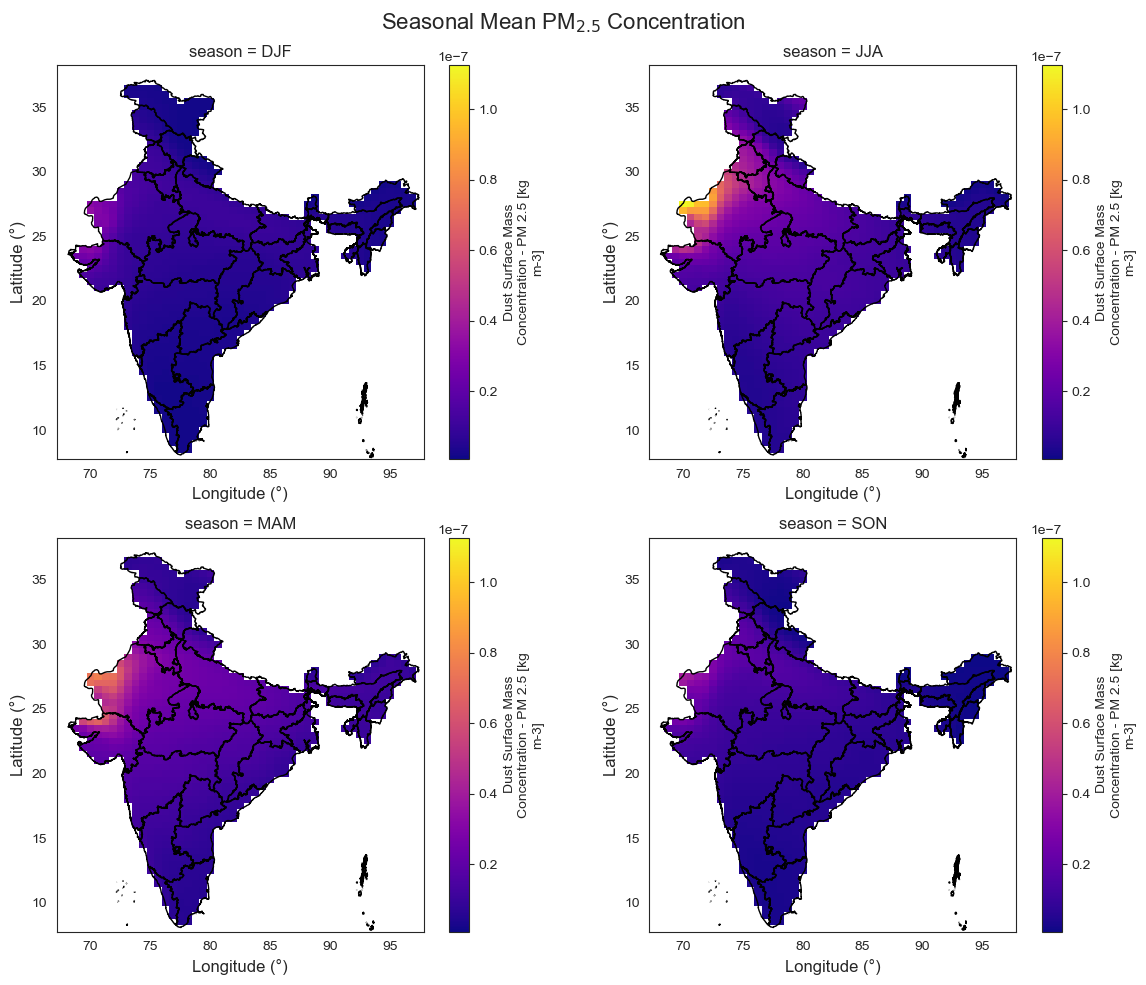

In [237]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Get the overall minimum and maximum values for all seasonal time means
overall_min = seasonal_time_means.min().values
overall_max = seasonal_time_means.max().values

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    plot = seasonal_time_means.sel(season=season).plot(ax=ax, cmap='plasma',
                                                        vmin=overall_min, vmax=overall_max)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


AttributeError: 'DataArray' object has no attribute 'capitalize'

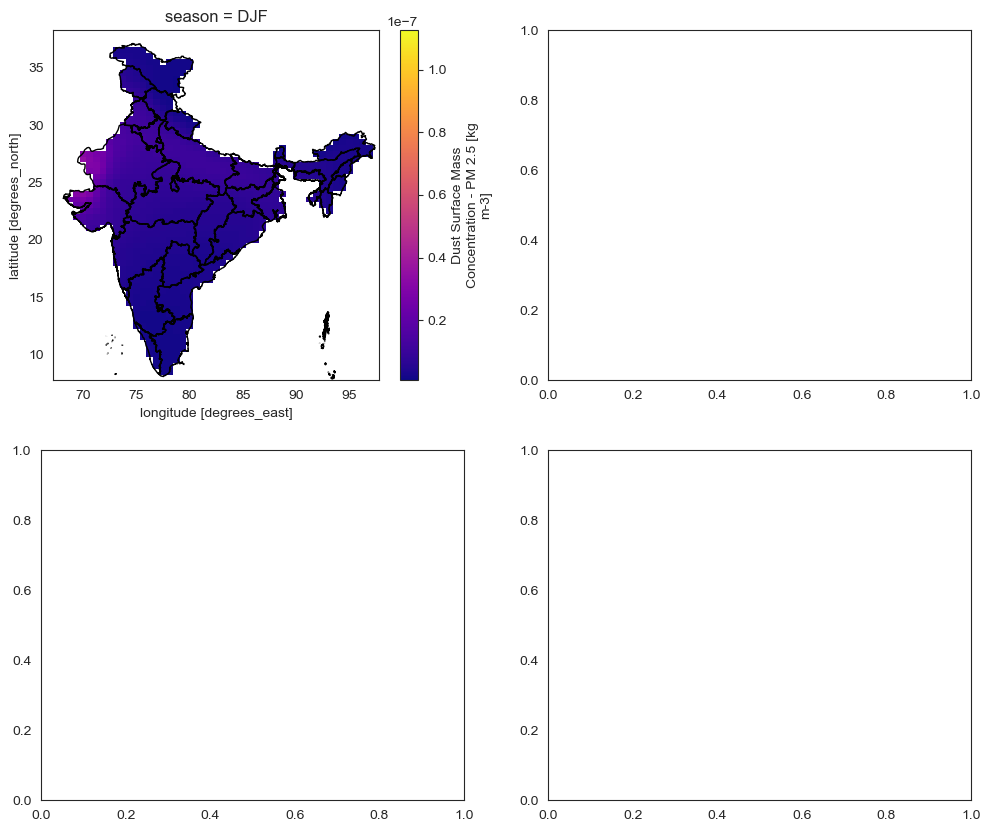

In [239]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Get the overall minimum and maximum values for all seasonal time means
overall_min = seasonal_time_means.min().values
overall_max = seasonal_time_means.max().values

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    plot = seasonal_time_means.sel(season=season).plot(ax=ax, cmap='plasma',
                                                        vmin=overall_min, vmax=overall_max)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)
    ax.set_title(season.capitalize())  # Convert season name to string and capitalize it

# Add colorbar
cbar = fig.colorbar(plot, ax=axs, orientation='vertical', shrink=0.8)
cbar.set_label('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)  # Set colorbar label

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


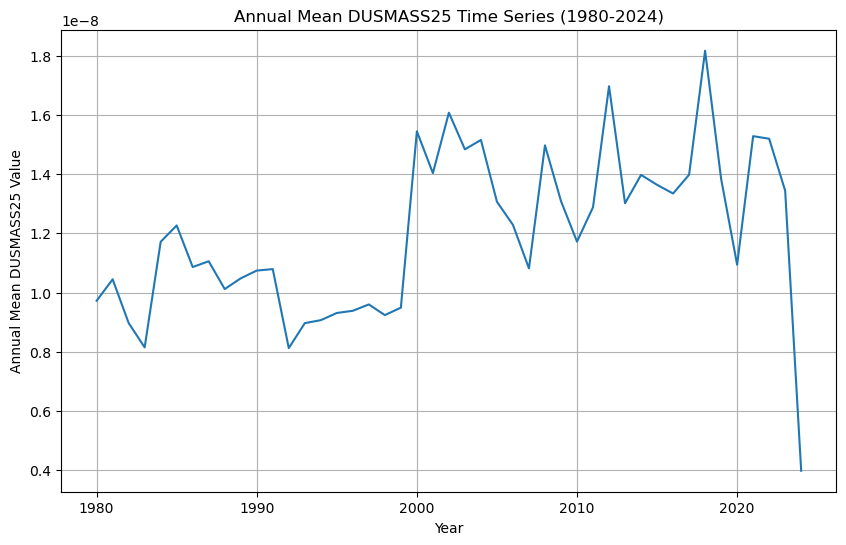

In [35]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Plot time series for annual mean
plt.figure(figsize=(10, 6))
annual_mean_collapsed.plot.line(x='year')
plt.title('Annual Mean DUSMASS25 Time Series (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Annual Mean DUSMASS25 Value')
plt.grid(True)
plt.show()


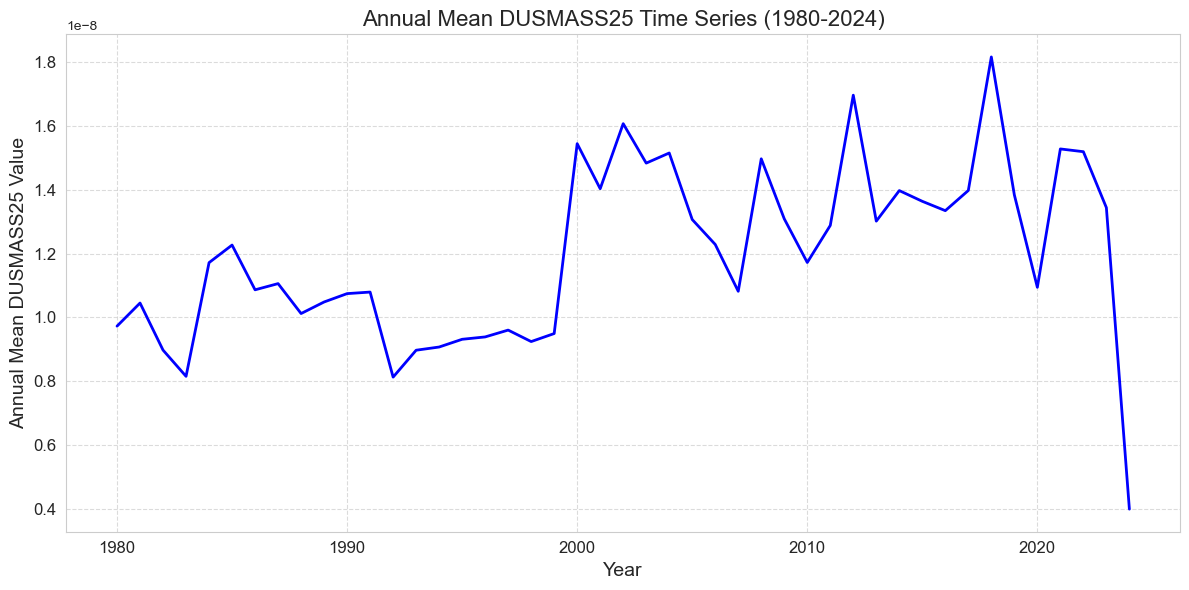

In [37]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Plot time series for annual mean with enhanced styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.lineplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', color='blue', linewidth=2)
plt.title('Annual Mean DUSMASS25 Time Series (1980-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Mean DUSMASS25 Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


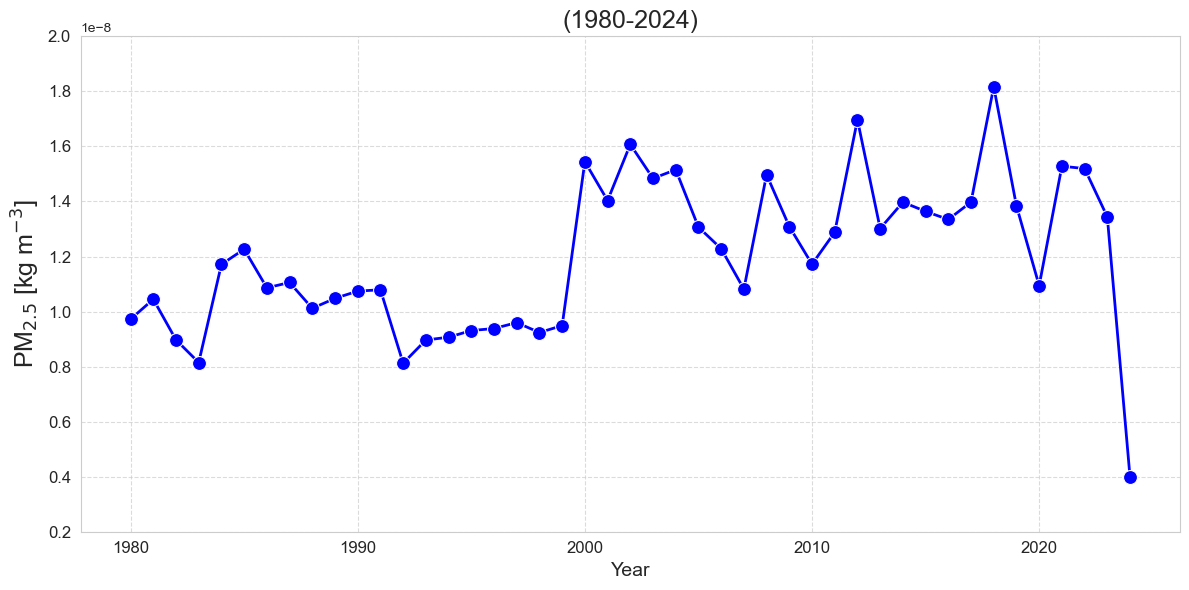

In [44]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Plot time series for annual mean with enhanced styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.lineplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', color='blue', linewidth=2, marker='o', markersize=10)
plt.title('(1980-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Set ymin and ymax for y-axis
plt.ylim(0.2 * 1e-8, 2.0 * 1e-8)

plt.show()


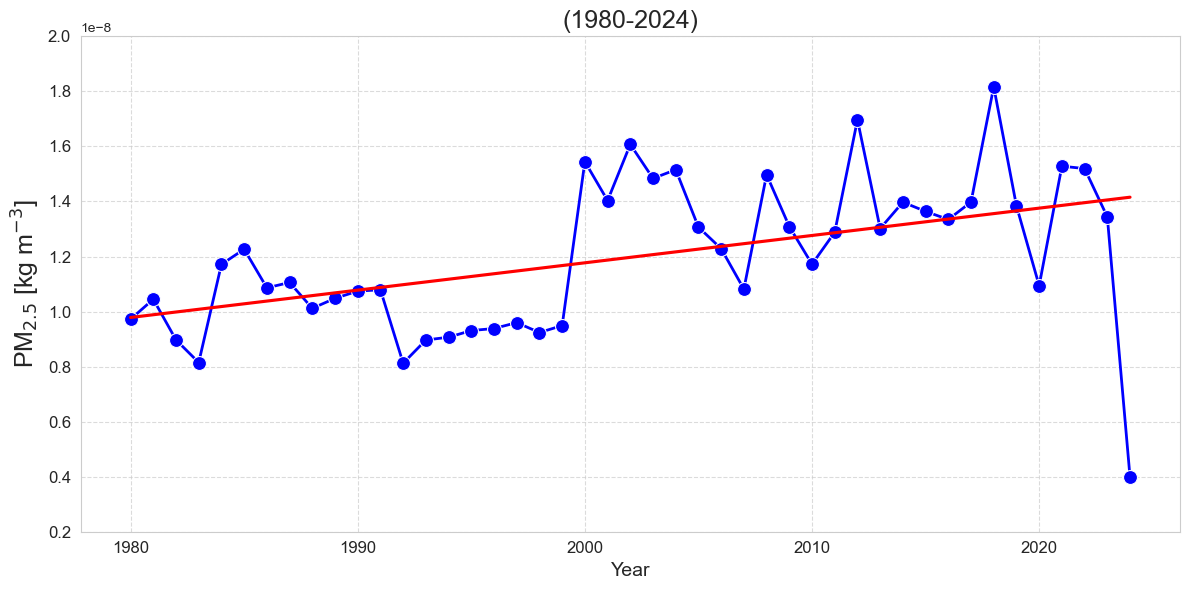

In [45]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Plot time series for annual mean with enhanced styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.lineplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', color='blue', linewidth=2, marker='o', markersize=10)
sns.regplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', scatter=False, color='red', ci=None)  # Add linear trend line
plt.title('(1980-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Set ymin and ymax for y-axis
plt.ylim(0.2 * 1e-8, 2.0 * 1e-8)

plt.show()


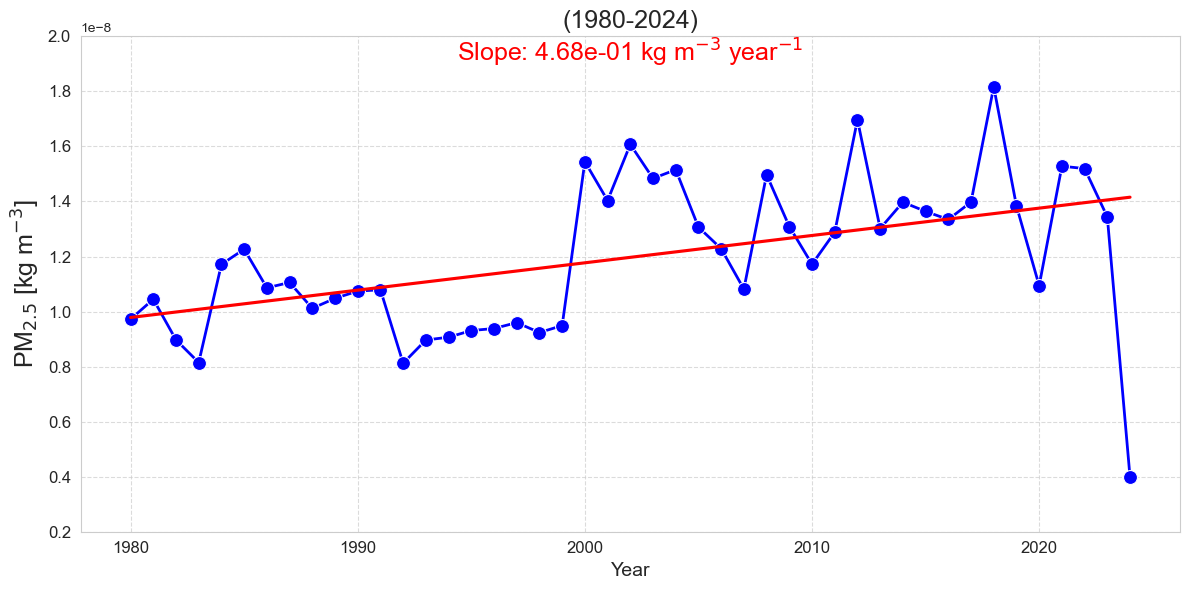

In [49]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Plot time series for annual mean with enhanced styling
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.lineplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', color='blue', linewidth=2, marker='o', markersize=10)
sns.regplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', scatter=False, color='red', ci=None)  # Add linear trend line

# Get slope of the linear trend line
slope = annual_mean_collapsed.to_dataframe().reset_index().corr().iloc[0, 1]

# Annotate the plot with the slope value at the top center and red color
plt.annotate(f'Slope: {slope:.2e} kg m$^{{-3}}$ year$^{{-1}}$', xy=(0.5, 0.95), xycoords='axes fraction', fontsize=18, color='red', ha='center')

plt.title('(1980-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Set ymin and ymax for y-axis
plt.ylim(0.2 * 1e-8, 2.0 * 1e-8)

plt.show()


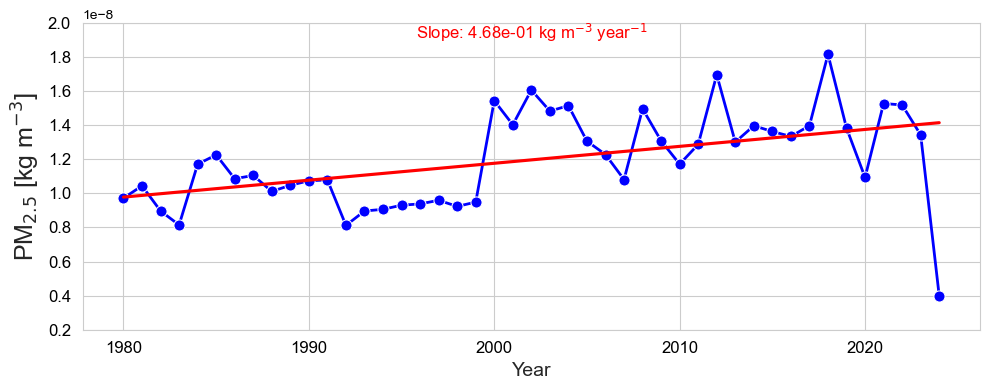

In [107]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Plot time series for annual mean with enhanced styling
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.lineplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', color='blue', linewidth=2, marker='o', markersize=8)
sns.regplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='year', y='DUSMASS25', scatter=False, color='red', ci=None)  # Add linear trend line

# Get slope of the linear trend line
slope = annual_mean_collapsed.to_dataframe().reset_index().corr().iloc[0, 1]

# Annotate the plot with the slope value at the top center and red color
plt.annotate(f'Slope: {slope:.2e} kg m$^{{-3}}$ year$^{{-1}}$', xy=(0.5, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='center')

plt.title('', fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=18)
plt.xticks(fontsize=12, color='black')  # Set x-axis tick mark properties
plt.yticks(fontsize=12, color='black')  # Set y-axis tick mark properties
#plt.grid(True, linestyle='--', alpha=1)
plt.tick_params(axis='x', colors='black', width=1, length=5, direction='out')  # Set x-axis tick marks to black with border
plt.tick_params(axis='y', colors='black', width=1, length=5, direction='out')  # Set y-axis tick marks to black with border
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Set ymin and ymax for y-axis
plt.ylim(0.2 * 1e-8, 2.0 * 1e-8)

plt.show()


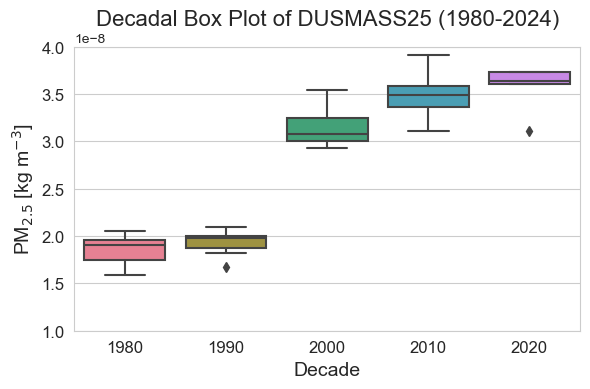

In [9]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette
import numpy as np

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Group data into decades
decades = annual_mean_collapsed['year'] // 10 * 10
annual_mean_collapsed['decade'] = decades

# Get unique decade values
unique_decades = np.unique(decades)

# Define a color palette for each decade
palette = sns.color_palette("husl", len(unique_decades))

# Plot box plots for each decade with different colors
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.boxplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='decade', y='PM25_surface_mass_concentration', palette=palette)
plt.title('Decadal Box Plot of DUSMASS25 (1980-2024)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.ylim(1 * 1e-8, 4.0 * 1e-8)
plt.show()


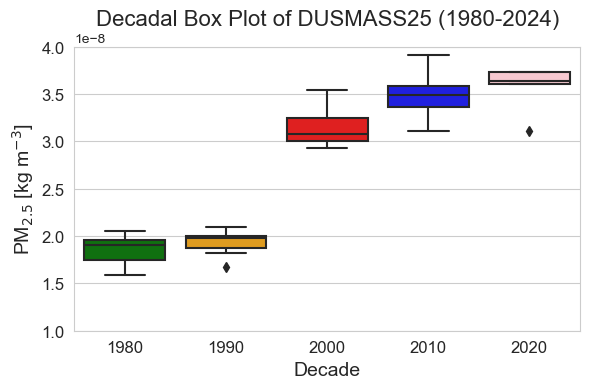

In [10]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette
import numpy as np

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Group data into decades
decades = annual_mean_collapsed['year'] // 10 * 10
annual_mean_collapsed['decade'] = decades

# Get unique decade values
unique_decades = np.unique(decades)

# Define a color palette for each decade
colors = ['green', 'orange', 'red', 'blue', 'pink']  # Updated color palette
palette = sns.color_palette(colors)

# Plot box plots for each decade with different colors
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.boxplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='decade', y='PM25_surface_mass_concentration', palette=palette)
plt.title('Decadal Box Plot of DUSMASS25 (1980-2024)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)  # Remove gridlines
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.ylim(1 * 1e-8, 4.0 * 1e-8)
plt.show()


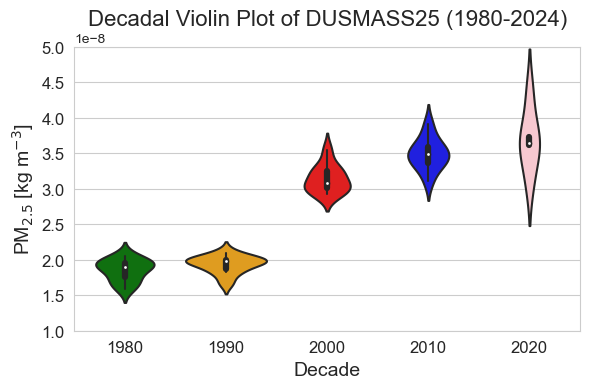

In [12]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette
import numpy as np

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Group data into decades
decades = annual_mean_collapsed['year'] // 10 * 10
annual_mean_collapsed['decade'] = decades

# Get unique decade values
unique_decades = np.unique(decades)

# Define a color palette for each decade
colors = ['green', 'orange', 'red', 'blue', 'pink']  # Updated color palette
palette = sns.color_palette(colors)

# Plot violin plots for each decade with different colors
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.violinplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='decade', y='PM25_surface_mass_concentration', palette=palette)
plt.title('Decadal Violin Plot of DUSMASS25 (1980-2024)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)  # Remove gridlines
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.ylim(1 * 1e-8, 5.0 * 1e-8)
plt.show()


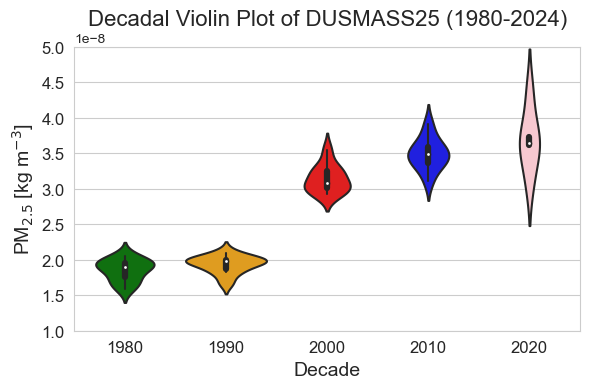

In [13]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette
import numpy as np

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Group data into decades
decades = annual_mean_collapsed['year'] // 10 * 10
annual_mean_collapsed['decade'] = decades

# Get unique decade values
unique_decades = np.unique(decades)

# Define a color palette for each decade
colors = ['green', 'orange', 'red', 'blue', 'pink']  # Updated color palette
palette = sns.color_palette(colors)

# Plot violin plots for each decade with different colors
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics
sns.violinplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='decade', y='PM25_surface_mass_concentration', palette=palette)
plt.title('Decadal Violin Plot of DUSMASS25 (1980-2024)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)  # Remove gridlines
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.ylim(1 * 1e-8, 5.0 * 1e-8)
plt.show()


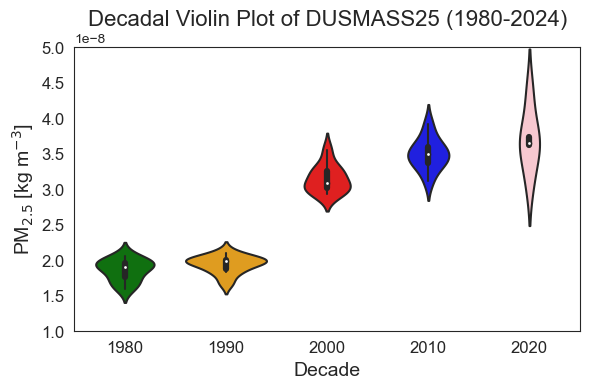

In [14]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette
import numpy as np

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Take mean along latitude and longitude dimensions
annual_mean_collapsed = annual_mean.mean(dim=['lat', 'lon'])

# Group data into decades
decades = annual_mean_collapsed['year'] // 10 * 10
annual_mean_collapsed['decade'] = decades

# Get unique decade values
unique_decades = np.unique(decades)

# Define a color palette for each decade
colors = ['green', 'orange', 'red', 'blue', 'pink']  # Updated color palette
palette = sns.color_palette(colors)

# Plot violin plots for each decade with different colors
plt.figure(figsize=(6, 4))
sns.set_style("white")  # Set seaborn style to remove all grid lines
sns.violinplot(data=annual_mean_collapsed.to_dataframe().reset_index(), x='decade', y='PM25_surface_mass_concentration', palette=palette)
plt.title('Decadal Violin Plot of DUSMASS25 (1980-2024)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.ylim(1 * 1e-8, 5.0 * 1e-8)
plt.show()


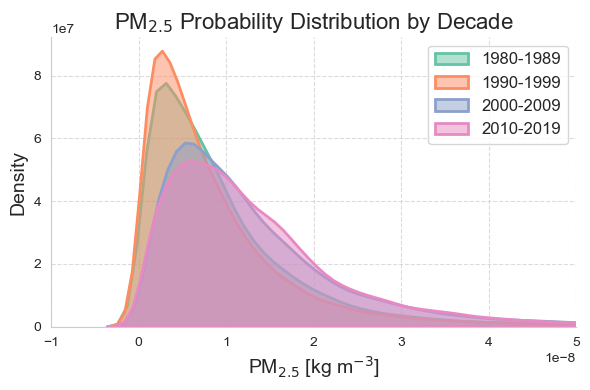

In [91]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Set a custom color palette for seaborn
sns.set_palette("Set2")

# Plot probability distribution curves for each decade
fig, ax = plt.subplots(figsize=(6, 4))

# KDE for each decade with shaded areas
for decade_start in decades:
    decade_data = subset_data.sel(time=slice(f'{decade_start}-01-01', f'{decade_start + 9}-12-31'))
    data = decade_data.values.flatten()
    label = f'{decade_start}-{decade_start + 9}'
    sns.kdeplot(data, label=label, ax=ax, linewidth=2, fill=True, alpha=0.5)



# Set plot aesthetics
ax.set_title('PM$_{2.5}$ Probability Distribution by Decade', fontsize=16)
ax.set_xlabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Set x-axis limits
plt.xlim(-0.1e-7, 0.5e-7)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


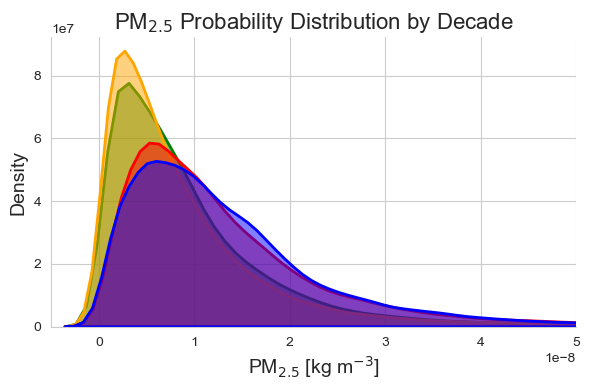

In [104]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Set colors for each decade
colors = ['green', 'orange', 'red', 'blue']

# Plot probability distribution curves for each decade
fig, ax = plt.subplots(figsize=(6, 4))

# KDE for each decade with shaded areas
for i, decade_start in enumerate(decades):
    decade_data = subset_data.sel(time=slice(f'{decade_start}-01-01', f'{decade_start + 9}-12-31'))
    data = decade_data.values.flatten()
    sns.kdeplot(data, ax=ax, linewidth=2, fill=True, alpha=0.5, color=colors[i])
    
    # Add separate line for each decade
    plt.plot([], [], color=colors[i], linewidth=2)

# Set plot aesthetics
ax.set_title('PM$_{2.5}$ Probability Distribution by Decade', fontsize=16)
ax.set_xlabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.grid(True, linestyle='-', alpha=1)

# Set x-axis limits
plt.xlim(-0.05e-7, 0.5e-7)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


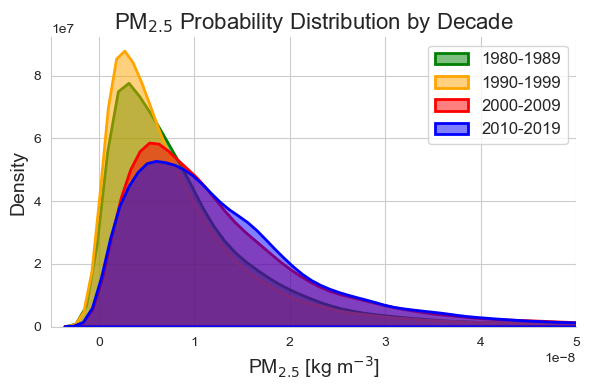

In [108]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Set colors for each decade
colors = ['green', 'orange', 'red', 'blue']

# Plot probability distribution curves for each decade
fig, ax = plt.subplots(figsize=(6, 4))

# KDE for each decade with shaded areas
for i, decade_start in enumerate(decades):
    decade_data = subset_data.sel(time=slice(f'{decade_start}-01-01', f'{decade_start + 9}-12-31'))
    data = decade_data.values.flatten()
    sns.kdeplot(data, ax=ax, linewidth=2, fill=True, alpha=0.5, color=colors[i], label=f'{decade_start}-{decade_start + 9}')
    
    # Add separate line for each decade
    plt.plot([], [], color=colors[i], linewidth=2)

# Set plot aesthetics
ax.set_title('PM$_{2.5}$ Probability Distribution by Decade', fontsize=16)
ax.set_xlabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.grid(True, linestyle='-', alpha=1)

# Set x-axis limits
plt.xlim(-0.05e-7, 0.5e-7)

# Show legend
plt.legend(fontsize=12)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


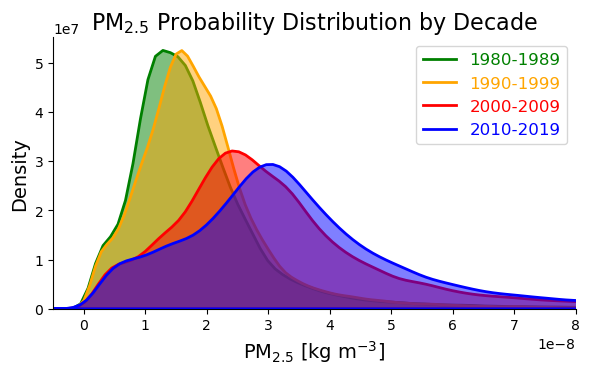

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the NetCDF file
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Extract subset data based on the specified latitude and longitude ranges
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Define decades
decades = range(1980, 2020, 10)

# Set colors for each decade
colors = ['green', 'orange', 'red', 'blue']

# Plot probability distribution curves for each decade
fig, ax = plt.subplots(figsize=(6, 4))

# Lists to store legend handles and labels
legend_handles = []

# KDE for each decade with shaded areas
for i, decade_start in enumerate(decades):
    decade_data = subset_data.sel(time=slice(f'{decade_start}-01-01', f'{decade_start + 9}-12-31'))
    data = decade_data.values.flatten()
    kde_line = sns.kdeplot(data, ax=ax, linewidth=2, fill=True, alpha=0.5, color=colors[i], label=f'{decade_start}-{decade_start + 9}')
    
    # Add separate line for each decade
    plt.plot([], [], color=colors[i], linewidth=2)
    
    # Create proxy artist for legend
    legend_handles.append(Line2D([0], [0], color=colors[i], linewidth=2))

# Set plot aesthetics
ax.set_title('PM$_{2.5}$ Probability Distribution by Decade', fontsize=16)
ax.set_xlabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.grid(True, linestyle='-', alpha=1)
ax.grid(False)  # Remove gridlines
# Set x-axis limits
plt.xlim(-0.05e-7, 0.8e-7)

# Show legend
legend = plt.legend(handles=legend_handles, labels=[f'{decade}-{decade + 9}' for decade in decades], fontsize=12)

# Set legend text color to match line color
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)

# Beautify the plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()


In [17]:
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2024
subset_data = subset_data.sel(time=slice('1980-01-01', '2024-12-31'))

# Calculate monthly mean
monthly_mean = subset_data.resample(time='M').mean()

# Print monthly mean
print("Monthly Mean:")
print(monthly_mean)

# Calculate annual mean
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Convert monthly mean and annual mean DataArrays to pandas DataFrames
monthly_mean_df = monthly_mean.to_dataframe().reset_index()
annual_mean_df = annual_mean.to_dataframe().reset_index()

# Print the DataFrames
print("Monthly Mean:")
print(monthly_mean_df)

print("\nAnnual Mean:")
print(annual_mean_df)



Monthly Mean:
<xarray.DataArray 'PM25_surface_mass_concentration' (time: 530, lat: 61, lon: 48)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., na

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Sample data
x = np.linspace(1980, 2024, 45)  # Assuming 45 years of data
y = annual_mean_collapsed_filtered.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err_collapsed_filtered.values  # Your annual standard error data

# Plot
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics

plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o')

plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)
plt.title('Annual Mean with Error Bars', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


NameError: name 'annual_mean_collapsed_filtered' is not defined

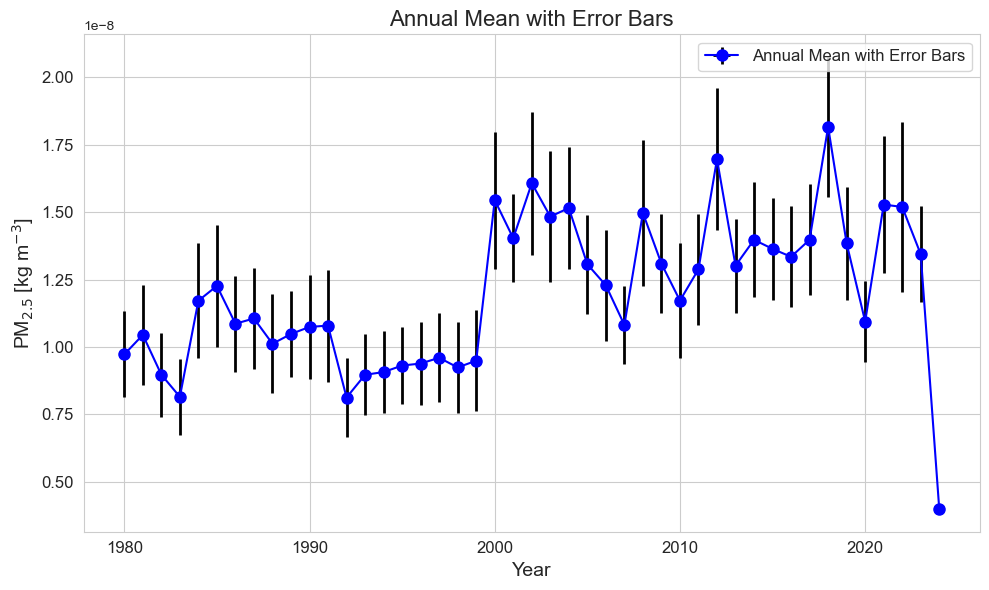

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palette

# Sample data
x = np.linspace(1980, 2024, 45)  # Assuming 45 years of data
y = annual_mean_collapsed_filtered.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err_collapsed_filtered.values  # Your annual standard error data

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics

# Plot with error bars
plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o',
             color='blue',  # Line color
             ecolor='black',  # Error bar color
             #capsize=5,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Add title and labels
plt.title('Annual Mean with Error Bars', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


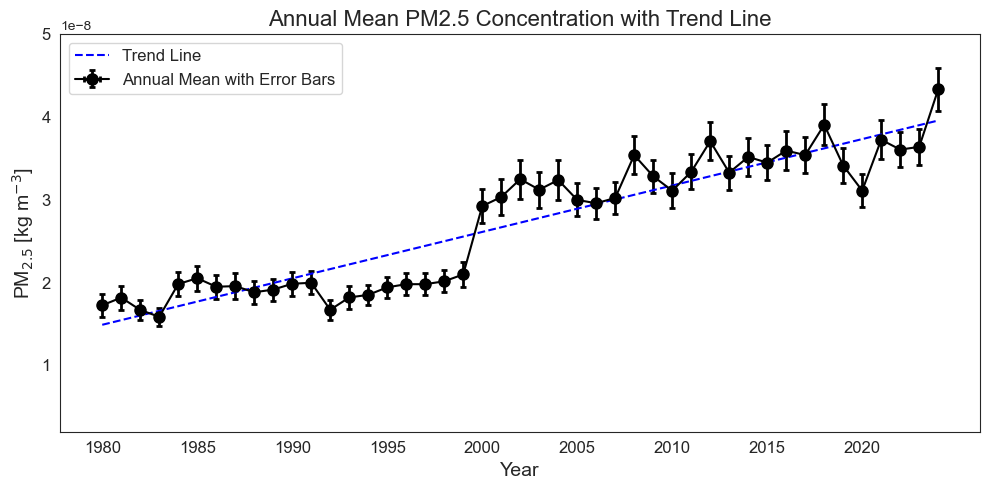

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc')
subset_data = nc_data['PM25_surface_mass_concentration'].sel(lat=lat_range, lon=lon_range)

# Select the time range from 1980 to 2024
subset_data = subset_data.sel(time=slice('1980-01-01', '2024-12-31'))

# Resample the data to annual frequency
annual_data = subset_data.resample(time='1Y').mean()

# Calculate annual mean and standard error
annual_mean = annual_data.mean(dim=('lat', 'lon'))
annual_std_err = annual_data.std(dim=('lat', 'lon')) / np.sqrt(len(annual_data))

# Sample data
x = np.arange(1980, 2025)  # Assuming 45 years of data
y = annual_mean.values  # Your annual mean data
xerr = 0  # You can set your own x error or leave it as 0
yerr = annual_std_err.values  # Your annual standard error data

# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
trend_line = np.poly1d(coefficients)

# Plot
plt.figure(figsize=(10, 5))
sns.set_style("white")  # Set seaborn style for better aesthetics

# Plot with error bars
plt.errorbar(x, y,
             xerr=xerr,
             yerr=yerr,
             fmt='-o',
             color='black',  # Line color
             ecolor='black',  # Error bar color
             capsize=2,  # Size of error bar caps
             elinewidth=2,  # Width of error bar lines
             capthick=2,  # Thickness of error bar caps
             markersize=8,  # Size of markers
             label='Annual Mean with Error Bars')

# Plot trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('Annual Mean PM2.5 Concentration with Trend Line', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('PM$_{2.5}$ [kg m$^{-3}$]', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Set ticks size and labels for both x and y axes
plt.xticks(np.arange(1980, 2025, 5), fontsize=12)
plt.yticks(fontsize=12)

# Set ymin and ymax for y-axis
plt.ylim(0.2 * 1e-8, 5 * 1e-8)

# Show plot
plt.tight_layout()
plt.show()



In [33]:
# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
slope = coefficients[0]  # The slope is the first coefficient
print("Slope of the trend line:", slope)



Slope of the trend line: 5.607605093783304e-10


In [34]:
# Fit a polynomial regression line
coefficients = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
slope = coefficients[0]  # The slope is the first coefficient
slope_per_year = slope  # Assuming x represents years, the slope per year is the same as the overall slope

# Calculate the slope per year
years_in_data = len(x)
slope_per_year /= years_in_data

print("Slope per year:", slope_per_year)


Slope per year: 1.2461344652851786e-11


In [ ]:
#                                                 TREND

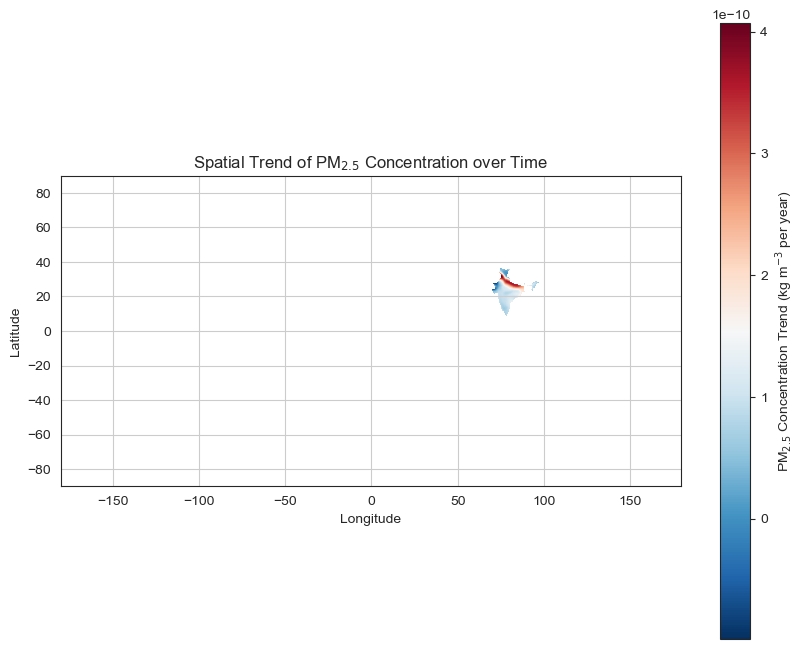

In [210]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc'
nc_data = xr.open_dataset(file_path)
# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India


# Extract latitude and longitude coordinates
latitudes = nc_data['lat'].values
longitudes = nc_data['lon'].values

# Extract time coordinate
time = nc_data['time']

# Flatten the subset_data array to perform linear regression
pm25_values = nc_data['DUSMASS25'].values.reshape(len(time), -1)

# Convert time to years (assuming time is in days since a reference date)
time_years = (time - time[0]) / np.timedelta64(1, 'D') / 365.25

# Create arrays to store the slope of each grid point
slope_values = np.zeros_like(pm25_values[0])

# Calculate linear trend at each grid point
for i in range(len(pm25_values[0])):
    slope, _, _, _, _ = stats.linregress(time_years, pm25_values[:, i])
    slope_values[i] = slope

# Reshape slope array to match the original grid shape
slope_values = slope_values.reshape(len(latitudes), len(longitudes))

# Plotting the spatial trend
plt.figure(figsize=(10, 8))
plt.imshow(slope_values, cmap='RdBu_r', extent=(longitudes[0], longitudes[-1], latitudes[0], latitudes[-1]), origin='lower')
plt.colorbar(label='PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Trend of PM$_{2.5}$ Concentration over Time')
plt.grid(True)
plt.show()


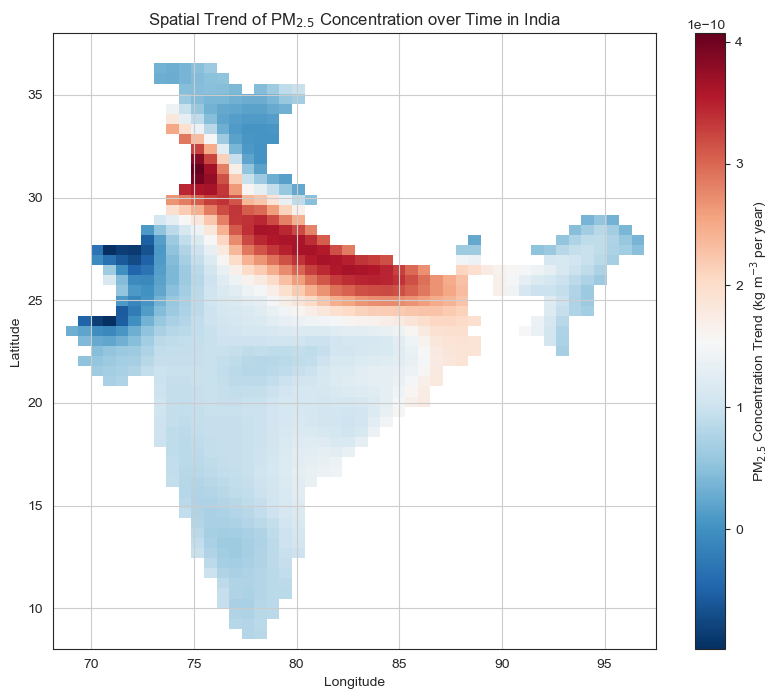

In [211]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Flatten the subset_data array to perform linear regression
pm25_values = subset_data['DUSMASS25'].values.reshape(len(time), -1)

# Convert time to years (assuming time is in days since a reference date)
time_years = (time - time[0]) / np.timedelta64(1, 'D') / 365.25

# Create arrays to store the slope of each grid point
slope_values = np.zeros_like(pm25_values[0])

# Calculate linear trend at each grid point
for i in range(len(pm25_values[0])):
    slope, _, _, _, _ = stats.linregress(time_years, pm25_values[:, i])
    slope_values[i] = slope

# Reshape slope array to match the original grid shape
slope_values = slope_values.reshape(len(latitudes), len(longitudes))

# Plotting the spatial trend
plt.figure(figsize=(10, 8))
plt.imshow(slope_values, cmap='RdBu_r', extent=(longitudes[0], longitudes[-1], latitudes[0], latitudes[-1]), origin='lower')
plt.colorbar(label='PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Trend of PM$_{2.5}$ Concentration over Time in India')
plt.grid(True)
plt.show()


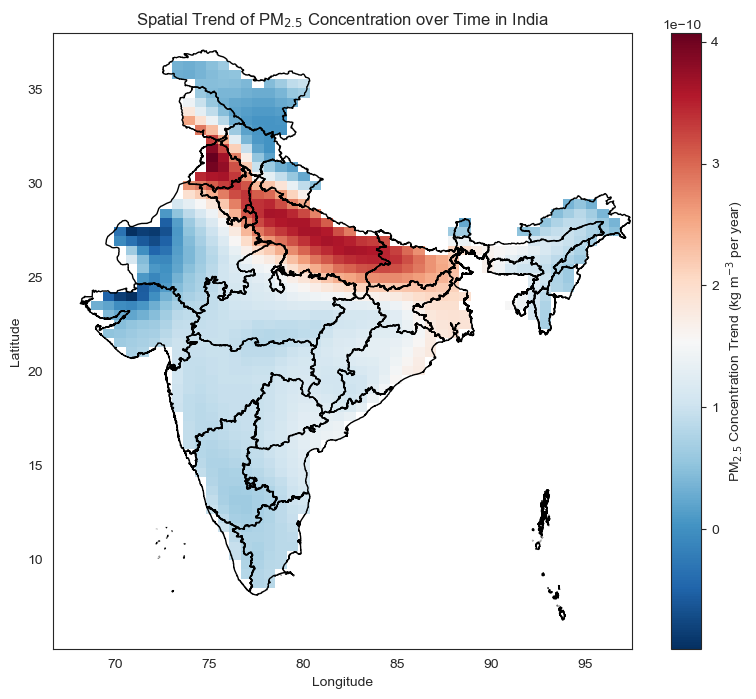

In [214]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Flatten the subset_data array to perform linear regression
pm25_values = subset_data['DUSMASS25'].values.reshape(len(time), -1)

# Convert time to years (assuming time is in days since a reference date)
time_years = (time - time[0]) / np.timedelta64(1, 'D') / 365.25

# Create arrays to store the slope of each grid point
slope_values = np.zeros_like(pm25_values[0])

# Calculate linear trend at each grid point
for i in range(len(pm25_values[0])):
    slope, _, _, _, _ = stats.linregress(time_years, pm25_values[:, i])
    slope_values[i] = slope

# Reshape slope array to match the original grid shape
slope_values = slope_values.reshape(len(latitudes), len(longitudes))

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the spatial trend with the shapefile overlay
plt.figure(figsize=(10, 8))
plt.imshow(slope_values, cmap='RdBu_r', extent=(longitudes[0], longitudes[-1], latitudes[0], latitudes[-1]), origin='lower')
plt.colorbar(label='PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Trend of PM$_{2.5}$ Concentration over Time in India')

# Overlay India shapefile
for geometry in india_shape['geometry']:
    if geometry.geom_type == 'Polygon':
        plt.fill(*geometry.exterior.xy, color='none', edgecolor='black', linewidth=1)
    elif geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            plt.fill(*polygon.exterior.xy, color='none', edgecolor='black', linewidth=1)

#plt.grid(True)
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_3092\422478733.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


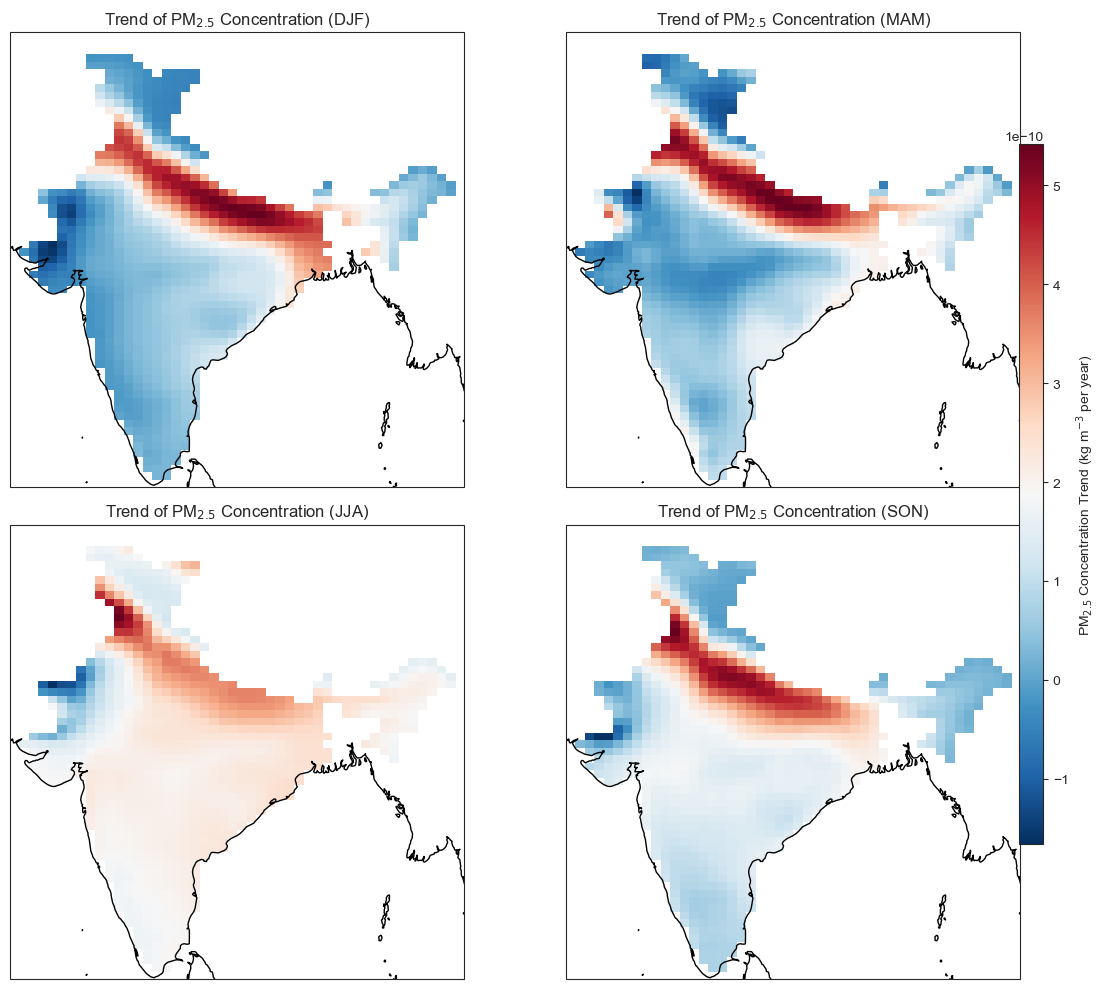

In [216]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Define seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Create arrays to store the slope of each grid point for each season
seasonal_slope_values = np.zeros((len(seasons), len(latitudes), len(longitudes)))

# Calculate linear trend for each season at each grid point
for i, season in enumerate(seasons):
    # Extract data for the current season
    season_data = subset_data.sel(time=subset_data['time.season'] == season)
    pm25_values = season_data['DUSMASS25'].values
    
    # Convert time to years (assuming time is in days since a reference date)
    time_years = (season_data['time'] - season_data['time'][0]) / np.timedelta64(1, 'D') / 365.25
    
    # Calculate linear trend at each grid point for the current season
    for j in range(len(latitudes)):
        for k in range(len(longitudes)):
            slope, _, _, _, _ = stats.linregress(time_years, pm25_values[:, j, k])
            seasonal_slope_values[i, j, k] = slope

# Plotting the seasonal trend
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Define position for the colorbar

for i, season in enumerate(seasons):
    ax = axes.flatten()[i]
    im = ax.imshow(seasonal_slope_values[i], cmap='RdBu_r', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower')
    ax.set_title(f'Trend of PM$_{{2.5}}$ Concentration ({season})')
    ax.coastlines()

# Add colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.set_label('PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')

plt.tight_layout()
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_3092\3845907957.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


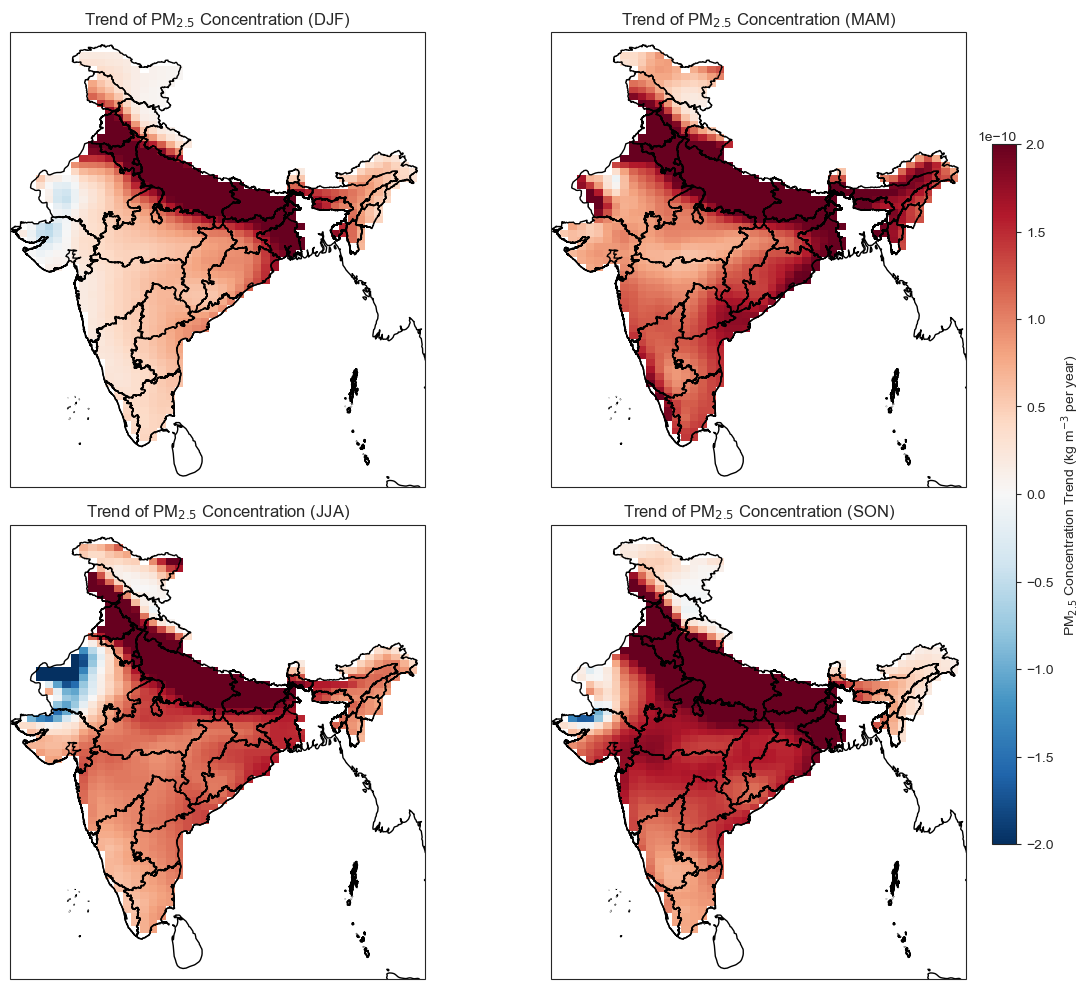

In [218]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Define seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Create arrays to store the slope of each grid point for each season
seasonal_slope_values = np.zeros((len(seasons), len(latitudes), len(longitudes)))

# Calculate linear trend for each season at each grid point
for i, season in enumerate(seasons):
    # Extract data for the current season
    season_data = subset_data.sel(time=subset_data['time.season'] == season)
    pm25_values = season_data['DUSMASS25'].values
    
    # Convert time to years (assuming time is in days since a reference date)
    time_years = (season_data['time'] - season_data['time'][0]) / np.timedelta64(1, 'D') / 365.25
    
    # Calculate linear trend at each grid point for the current season
    for j in range(len(latitudes)):
        for k in range(len(longitudes)):
            slope, _, _, _, _ = stats.linregress(time_years, pm25_values[:, j, k])
            seasonal_slope_values[i, j, k] = slope

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the seasonal trend with the shapefile overlay
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Define position for the colorbar

for i, season in enumerate(seasons):
    ax = axes.flatten()[i]
    im = ax.imshow(seasonal_slope_values[i], cmap='RdBu_r', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower', vmin=-2e-10, vmax=2e-10)
    ax.set_title(f'Trend of PM$_{{2.5}}$ Concentration ({season})')
    ax.coastlines()
    
    # Overlay India shapefile
    for geometry in india_shape['geometry']:
        if geometry.geom_type == 'Polygon':
            ax.fill(*geometry.exterior.xy, color='none', edgecolor='black', linewidth=1)
        elif geometry.geom_type == 'MultiPolygon':
            for polygon in geometry.geoms:
                ax.fill(*polygon.exterior.xy, color='none', edgecolor='black', linewidth=1)

# Add colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.set_label('PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')

plt.tight_layout()
plt.show()


C:\Users\Subhadeep Maishal\AppData\Local\Temp\ipykernel_11472\3408404046.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


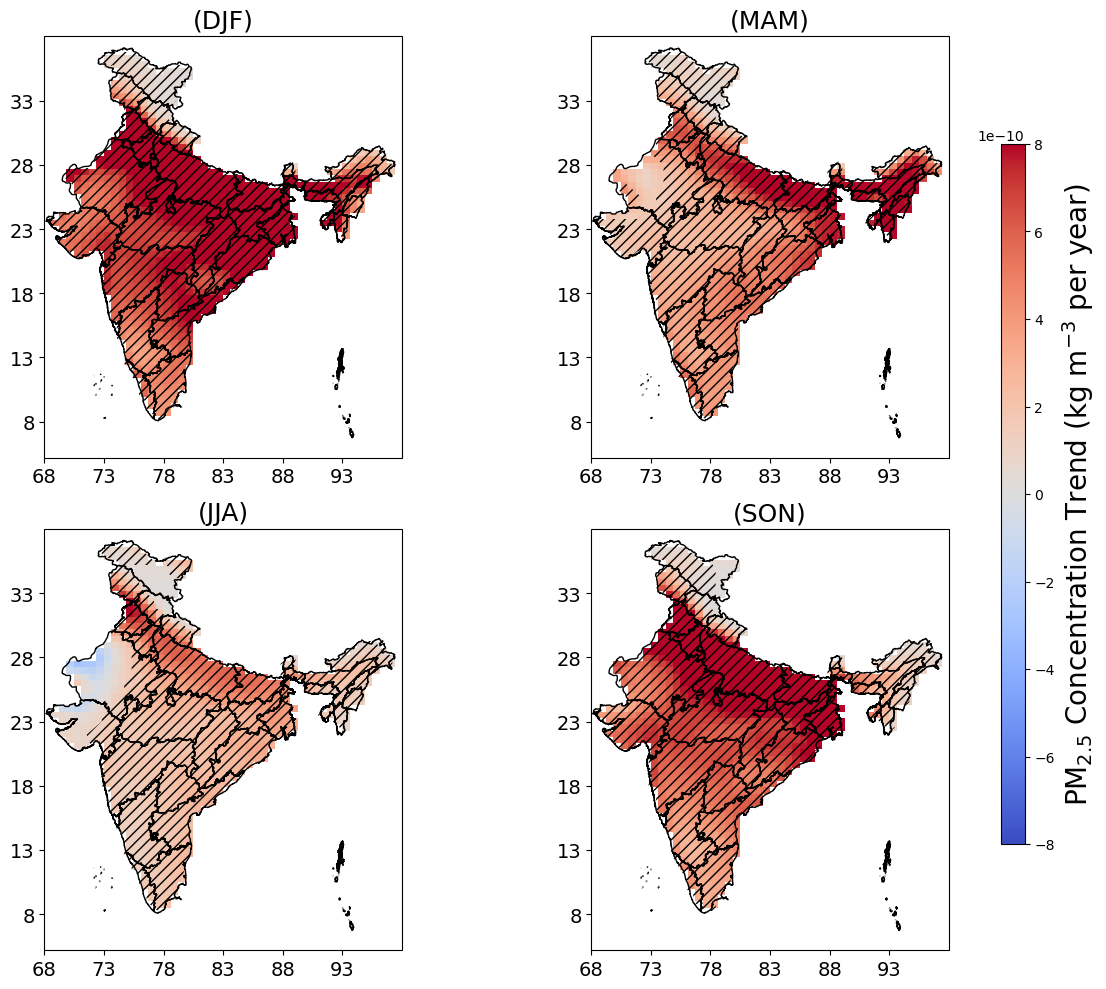

In [7]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Define seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Create arrays to store the slope and p-values of each grid point for each season
seasonal_slope_values = np.zeros((len(seasons), len(latitudes), len(longitudes)))
p_values = np.zeros((len(seasons), len(latitudes), len(longitudes)))

# Calculate linear trend for each season at each grid point
for i, season in enumerate(seasons):
    # Extract data for the current season
    season_data = subset_data.sel(time=subset_data['time.season'] == season)
    pm25_values = season_data['PM25_surface_mass_concentration'].values
    
    # Convert time to years (assuming time is in days since a reference date)
    time_years = (season_data['time'] - season_data['time'][0]) / np.timedelta64(1, 'D') / 365.25
    
    # Calculate linear trend and p-values at each grid point for the current season
    for j in range(len(latitudes)):
        for k in range(len(longitudes)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(time_years, pm25_values[:, j, k])
            seasonal_slope_values[i, j, k] = slope
            p_values[i, j, k] = p_value

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the seasonal trend with the shapefile overlay
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Define position for the colorbar

for i, season in enumerate(seasons):
    ax = axes.flatten()[i]
    im = ax.imshow(seasonal_slope_values[i], cmap='coolwarm', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower', vmin=-8e-10, vmax=8e-10)
    #cbar = plt.colorbar(im, extend='both')  # or extend='neither' depending on your preference
    ax.set_title(f'({season})', fontsize=18)
    #ax.coastlines()
    
    # Overlay India shapefile
    india_shape.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
    
    # Hatch significant regions (p < 0.05)
    sig_regions = np.where(p_values[i] < 0.05, 1, 0)
    ax.contourf(longitudes, latitudes, sig_regions, levels=[0, 0.5, 1], colors='none', hatches=['', '///'], alpha=0)
    
        # Increase tick label font size and add lat lon tick marks
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(np.arange(lon_range.start, lon_range.stop, 5))
    ax.set_yticks(np.arange(lat_range.start, lat_range.stop, 5))

# Add colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.set_label('PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)', fontsize=18)

# Increase colorbar label font size
cbar.ax.yaxis.label.set_fontsize(20)

plt.tight_layout()
plt.show()


In [ ]:
#                        ANNUAL TREND

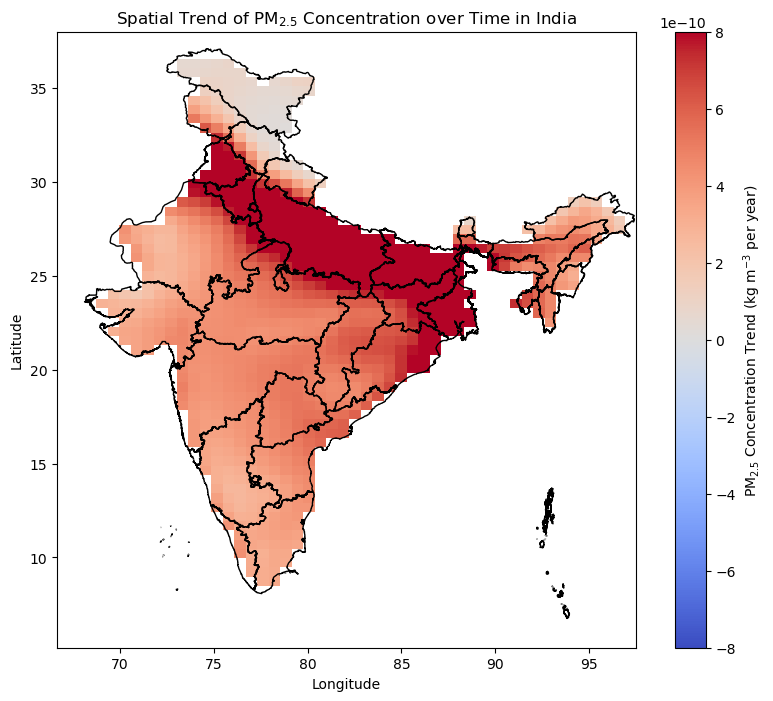

In [19]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Flatten the subset_data array to perform linear regression
pm25_values = subset_data['PM25_surface_mass_concentration'].values.reshape(len(time), -1)

# Convert time to years (assuming time is in days since a reference date)
time_years = (time - time[0]) / np.timedelta64(1, 'D') / 365.25

# Create arrays to store the slope of each grid point
slope_values = np.zeros_like(pm25_values[0])

# Calculate linear trend at each grid point
for i in range(len(pm25_values[0])):
    slope, _, _, _, _ = stats.linregress(time_years, pm25_values[:, i])
    slope_values[i] = slope

# Reshape slope array to match the original grid shape
slope_values = slope_values.reshape(len(latitudes), len(longitudes))

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the spatial trend with the shapefile overlay
plt.figure(figsize=(10, 8))
plt.imshow(slope_values, cmap='coolwarm', extent=(longitudes[0], longitudes[-1], latitudes[0], latitudes[-1]), origin='lower', vmin=-8e-10, vmax=8e-10)
plt.colorbar(label='PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Trend of PM$_{2.5}$ Concentration over Time in India')

# Overlay India shapefile
for geometry in india_shape['geometry']:
    if geometry.geom_type == 'Polygon':
        plt.fill(*geometry.exterior.xy, color='none', edgecolor='black', linewidth=1)
    elif geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            plt.fill(*polygon.exterior.xy, color='none', edgecolor='black', linewidth=1)

#plt.grid(True)
plt.show()


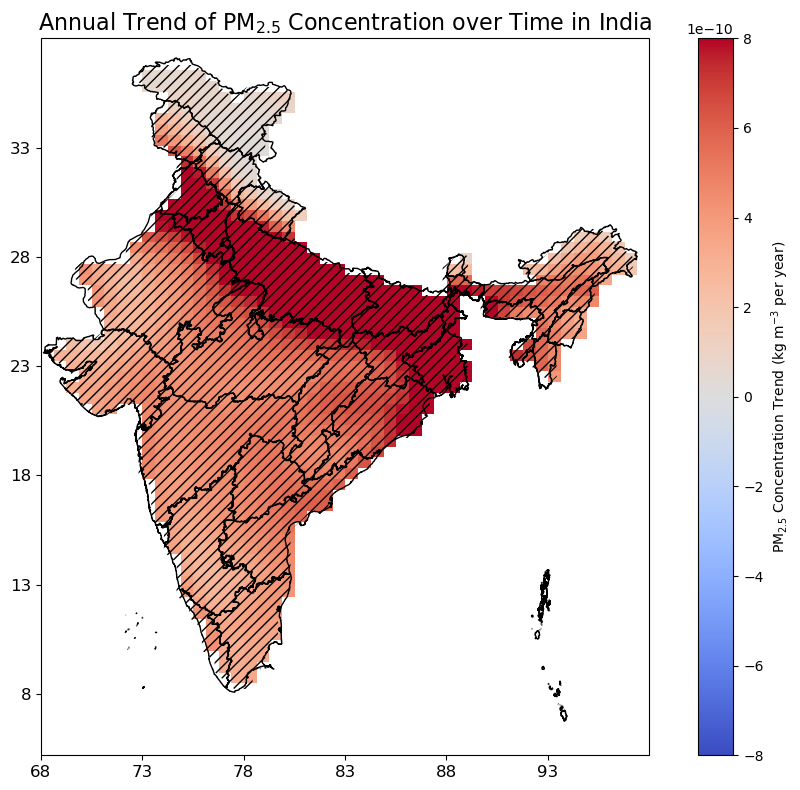

In [24]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Extract latitude and longitude coordinates
latitudes = subset_data['lat'].values
longitudes = subset_data['lon'].values

# Extract time coordinate
time = subset_data['time']

# Calculate linear trend and p-values for the entire time period
pm25_values = subset_data['PM25_surface_mass_concentration'].values
time_years = (time - time[0]) / np.timedelta64(1, 'D') / 365.25

# Create arrays to store the slope and p-values of each grid point
slope_values = np.zeros((len(latitudes), len(longitudes)))
p_values = np.zeros((len(latitudes), len(longitudes)))

# Calculate linear trend and p-values at each grid point
for i in range(len(latitudes)):
    for j in range(len(longitudes)):
        slope, intercept, r_value, p_value, std_err = stats.linregress(time_years, pm25_values[:, i, j])
        slope_values[i, j] = slope
        p_values[i, j] = p_value

# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the annual trend with the shapefile overlay
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the slope values
im = ax.imshow(slope_values, cmap='coolwarm', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower', vmin=-8e-10, vmax=8e-10)

# Overlay India shapefile
india_shape.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Hatch significant regions (p < 0.05)
sig_regions = np.where(p_values < 0.05, 1, 0)
ax.contourf(longitudes, latitudes, sig_regions, levels=[0, 0.5, 1], colors='none', hatches=['', '///'], alpha=0)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')

# Increase tick label font size and add lat lon tick marks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(lon_range.start, lon_range.stop, 5))
ax.set_yticks(np.arange(lat_range.start, lat_range.stop, 5))

# Add title
ax.set_title('Annual Trend of PM$_{2.5}$ Concentration over Time in India', fontsize=16)

plt.tight_layout()
plt.show()


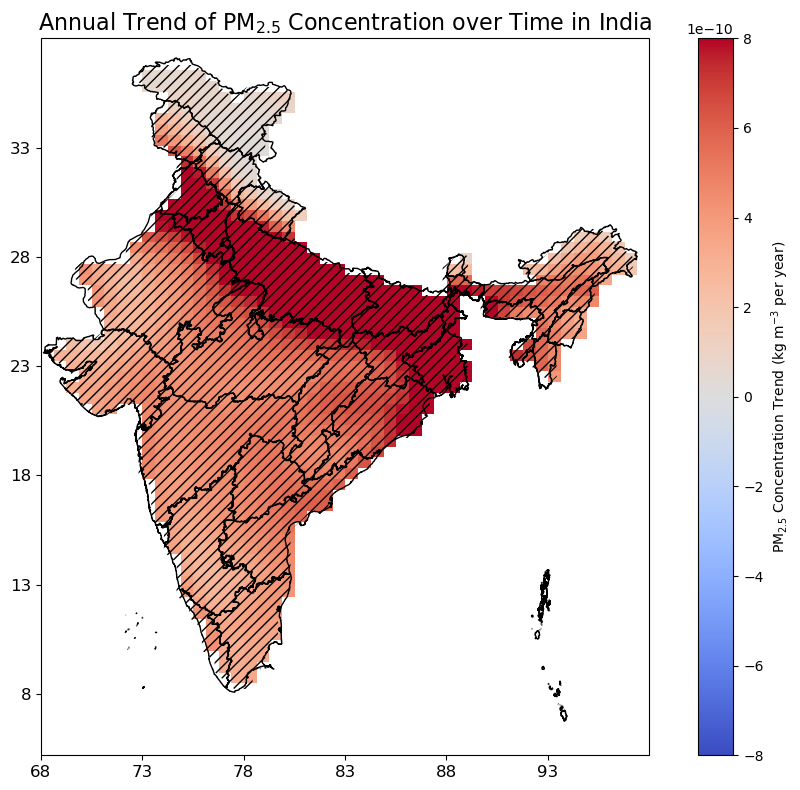

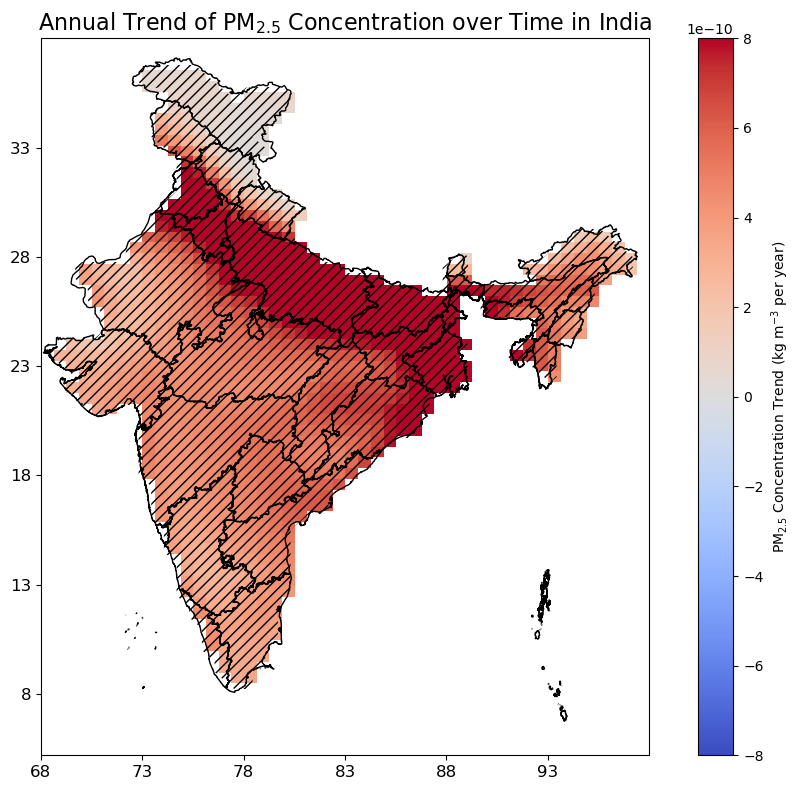

In [38]:
import numpy as np
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the NetCDF file
file_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/NEW_DATA/pul_india.nc'
nc_data = xr.open_dataset(file_path)

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)  # Latitude range for India
lon_range = slice(68, 98)  # Longitude range for India

# Subset the data within the specified latitude and longitude range
subset_data = nc_data.sel(lat=lat_range, lon=lon_range)

# Calculate annual mean from monthly data
annual_mean = subset_data.groupby('time.year').mean(dim='time')

# Extract latitude and longitude coordinates
latitudes = annual_mean['lat'].values
longitudes = annual_mean['lon'].values

# Extract time coordinate
years = annual_mean['year']

# Create arrays to store the slope and p-values of each grid point
slope_values = np.zeros((len(latitudes), len(longitudes)))
p_values = np.zeros((len(latitudes), len(longitudes)))

# Calculate linear trend and p-values at each grid point
for i in range(len(latitudes)):
    for j in range(len(longitudes)):
        slope, intercept, r_value, p_value, std_err = stats.linregress(years, annual_mean['PM25_surface_mass_concentration'][:, i, j])
        slope_values[i, j] = slope
        p_values[i, j] = p_value
# Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = 'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'
india_shape = india_shape.to_crs(nc_crs)

# Plotting the annual trend with the shapefile overlay
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the slope values
im = ax.imshow(slope_values, cmap='coolwarm', extent=(lon_range.start, lon_range.stop, lat_range.start, lat_range.stop), origin='lower', vmin=-8e-10, vmax=8e-10)

# Overlay India shapefile
india_shape.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Hatch significant regions (p < 0.05)
sig_regions = np.where(p_values < 0.05, 1, 0)
ax.contourf(longitudes, latitudes, sig_regions, levels=[0, 0.5, 1], colors='none', hatches=['', '///'], alpha=0)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('PM$_{2.5}$ Concentration Trend (kg m$^{-3}$ per year)')

# Increase tick label font size and add lat lon tick marks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(lon_range.start, lon_range.stop, 5))
ax.set_yticks(np.arange(lat_range.start, lat_range.stop, 5))

# Add title
ax.set_title('Annual Trend of PM$_{2.5}$ Concentration over Time in India', fontsize=16)

plt.tight_layout()
plt.show()


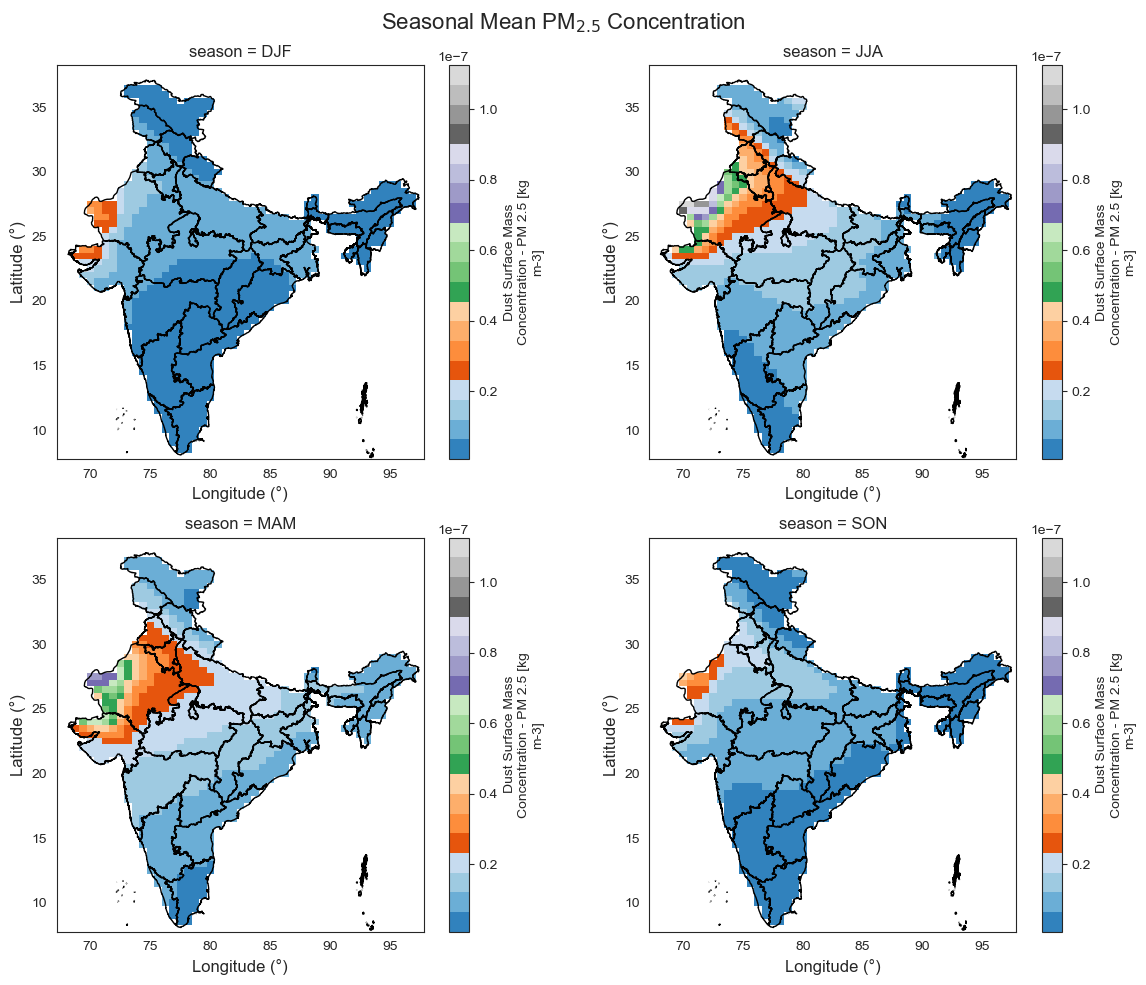

In [244]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Determine the color scale limits across all seasons
vmin = seasonal_time_means.min().values  # Minimum value
vmax = seasonal_time_means.max().values  # Maximum value

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    seasonal_time_means.sel(season=season).plot(ax=ax, cmap='tab20c', vmin=vmin, vmax=vmax)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


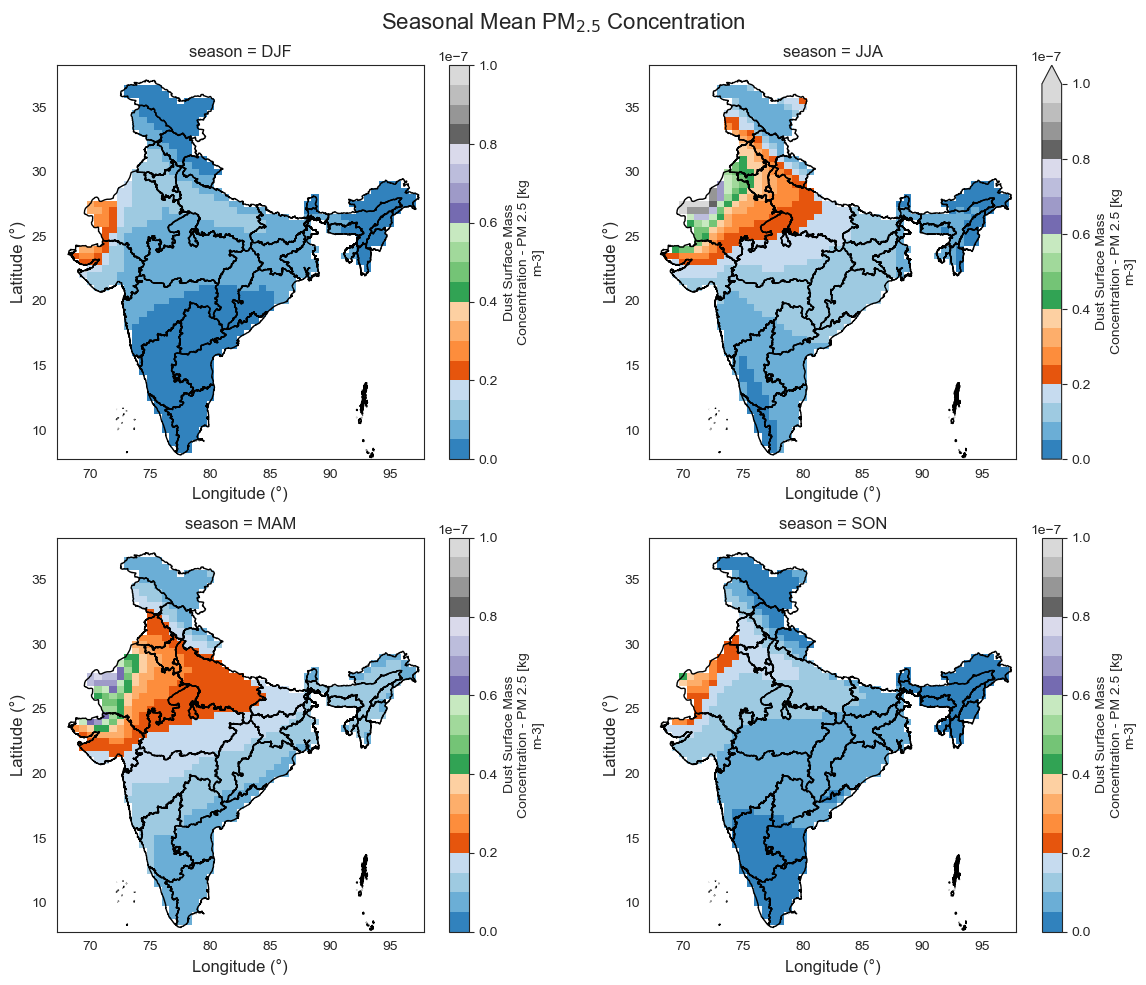

In [250]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load NetCDF file and extract latitude and longitude ranges
nc_data = xr.open_dataset('C:/Users/Subhadeep Maishal/Music/JUP/Breathe/pul_india.nc')
lat_range = slice(8, 38)  # Latitude range from 8 to 38
lon_range = slice(67, 98)  # Longitude range from 67 to 98

# Subset the data within the specified latitude and longitude range
subset_data = nc_data['DUSMASS25'].sel(lat=lat_range, lon=lon_range)

# Calculate the seasonal time mean
seasonal_time_means = subset_data.groupby('time.season').mean('time')

# Step 2: Load and reproject the shapefile to match the CRS of the NetCDF data
shapefile_path = r'C:/Users/Subhadeep Maishal/Music/JUP/Breathe/India-State/shp/India_State_Boundary.shp'
india_shape = gpd.read_file(shapefile_path)
nc_crs = 'EPSG:4326'  # Assuming the data is in WGS 84 (EPSG:4326)
india_shape = india_shape.to_crs(nc_crs)

# Step 3: Plot the seasonal time means
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for season, ax in zip(seasonal_time_means['season'], axs.flat):
    seasonal_time_means.sel(season=season).plot(ax=ax, cmap='tab20c', vmin=0, vmax=1.0*1e-7)
    india_shape.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add title and labels
fig.suptitle('Seasonal Mean PM$_{2.5}$ Concentration', fontsize=16)  # Increase title font size
for ax in axs.flat:
    ax.set_xlabel('Longitude (°)', fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel('Latitude (°)', fontsize=12)  # Increase y-axis label font size

# Add colorbar with vmin and vmax
#norm = Normalize(vmin=0, vmax=1.0)
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=axs, orientation='vertical', shrink=0.6)
#cbar.set_label('PM$_{2.5}$ Concentration (µg/m$^3$)', fontsize=12)  # Increase colorbar label font size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
